## Tensors in PyTorch

In [1]:
from __future__ import print_function
import torch

In [2]:
x = torch.empty(5, 3)

In [4]:
x

tensor([[1.1210e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [5]:
x = torch.rand(5, 3)
x

tensor([[0.2079, 0.7058, 0.5230],
        [0.1794, 0.5450, 0.0413],
        [0.6435, 0.4565, 0.9858],
        [0.8961, 0.1322, 0.7277],
        [0.5550, 0.5253, 0.8240]])

In [6]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [9]:
help(torch.zeros)

Help on built-in function zeros:

zeros(...)
    zeros(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `0`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the current device for the default 

In [5]:
x = x.new_ones(5, 3, dtype=torch.double)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [7]:
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[-0.6438, -1.6627, -1.0903],
        [ 0.3002,  0.4009, -0.7618],
        [ 0.1420,  0.9419,  0.1807],
        [-1.2571,  0.0923,  0.3649],
        [-0.2423,  0.1674,  0.6538]])

## AUTOGRAD: Automatic differentiation

AUTOGRAD：自动分化
PyTorch中所有神经网络的核心是autograd软件包。让我们先简要地介绍一下，然后再训练第一个神经网络。

autograd软件包为Tensor上的所有操作提供自动区分。这是一个按运行定义的框架，这意味着您的backprop是由代码的运行方式定义的，并且每次迭代都可以不同。

让我们通过一些示例以更简单的方式看待这一点。

张量
`torch.Tensor`是程序包的中心类。如果将其属性`.requires_grad`设置为`True`，它将开始跟踪对其的所有操作。完成计算后，您可以调用`.backward()`并自动计算所有梯度。该张量的梯度将累积到`.grad`属性中。

要停止tensor(张量)跟踪历史记录，可以调用`.detach()`将其与计算历史记录分离，并防止跟踪将来的计算。

为了防止跟踪历史记录（和使用内存），您还可以使用`torch.no_grad()`：包装代码块。这在评估模型时特别有用，因为模型可能具有可训练的参数并使 `require_grad = True`，但我们不需要梯度。

还有另外一类对autograd非常重要，它是一个 `Function`。

`Tensor`和`Function`相互连接并建立一个无环图，该图对完整的计算历史进行编码。每个tensor都有一个`.grad_fn`属性，该属性引用创建了张量的函数（用户创建的张量除外-它们的`grad_fn is None`）。

如果要计算导数，可以在Tensor上调用`.backward()`。如果Tensor是scalar标量（即，它包含一个元素数据），则无需为`Backward()`指定任何参数，但是，如果Tensor具有更多元素，则需要指定gradient梯度参数，该参数应匹配张量的shape。

In [8]:
import torch

Here we create a tensor and set `require_grad=True` to track computation

In [9]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [10]:
# use tensor opperation
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [12]:
y.grad_fn

In [13]:
# more operation
z = y * y * 3
out = z.mean()
out

tensor(27., grad_fn=<MeanBackward0>)

In [16]:
# requires_grad has default False

a = torch .randn(2, 2)
a = ((a * 3) / (a-1))
print(a.requires_grad)

a.requires_grad_(True)

print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


## Gradient

Now backprop, since $out$ contains a single scalar then `out.backward()`is equivalent to `out.backward(torch.tensor(1,))`

In [18]:
out.backward()

In [19]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [20]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

## Nerual Network

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [23]:
net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [26]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


## Loss Function

In [38]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0070,  0.0686, -0.0207,  0.0558, -0.1612, -0.0177,  0.0173,  0.0165,
          0.0146,  0.0242]], grad_fn=<AddmmBackward>)


In [39]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [41]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
loss

tensor(0.8399, grad_fn=<MseLossBackward>)

In [44]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop

In [45]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0171, -0.0057, -0.0081,  0.0024,  0.0039,  0.0138])


## Update the weight

In [46]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [47]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## Training a classifier

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


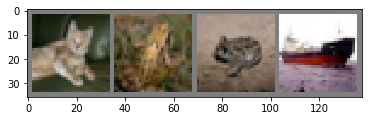

  cat  frog  frog  ship


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [1]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

NameError: name 'torch' is not defined

In [2]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

NameError: name 'testloader' is not defined